<a href="https://colab.research.google.com/github/matias-sanchez/Mentoria/blob/master/Ejercicios_Encuestas_Analisis_Y_Visualizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro al Dataset

Trabajaremos con un Dataset que describe encuestas de satisfacción realizadas por automotrices a sus usuarios luego de prestado un servicio. El mismo fue elaborado por el área de calidad y cada registro contiene la información concerniente a una encuesta telefónica que ha generado una “alerta de calidad”, incluyendo también el texto de los diálogos entre las partes.

Contamos con más de 11k registros, con aprox. 25 features de tipo variado (principalmente categóricos), brindando información sobre la encuesta en sí, sobre la alerta generada y su gestión, y sobre el servicio bajo análisis. Por cuestiones de privacidad algunos de los datos fueron anonimizados.

Link para su descarga: [Encuestas_Analisis_Y_Visualizacion](https://drive.google.com/file/d/1zsFEB4BPBxRfetInIAYbsw3l0l7XmGS6/view?usp=sharing)


## Descripción de los Features

1.   ***MARCA:*** Variable de tipo Categórica que identifica la marca del vehículo involucrado.
2.   ***FECHA ALERTA:*** Variable de tipo Fecha que representa la fecha en que se generó la alerta.
3.   ***FECHA VENCIMIENTO:*** Variable de tipo Fecha que representa la fecha de vencimiento para que la alerta sea gestionada.
4.   ***Mes:*** Variable de tipo Categórica que identifica el Mes en que se generó la alerta.
5.   ***Tipo de Alerta:*** Variable de tipo categórica que clasifica la alerta.
6.   ***STATUS:*** Variable de tipo Categórica que resume el estado de la gestión de esa alerta. "Gestionado", "Sin Gestión"
7.   ***PLAZO DE GESTION:*** Variable de tipo Categórica que clasifica el plazo de la gestión de esa alerta. "A Tiempo", "Fuera de Plazo"
8.   ***SUCURSAL:*** Variable de tipo Categórica que identifica la sucursal donde el cliente está es atendido.
9.   ***CANAL: ***Variable de tipo Categórica que clasifica de forma marco el Canal de atención.
10. ***Vendedor / RC:*** Variable de tipo Cualitativa Nominal que identifica al actor que interactuó con el cliente.
11. ***RESPONSABLE DE GESTIONAR ALERTA:*** Variable de tipo Cualitativa que identifica al responsable de gestionar la alerta (Nombre y Apellido).
12. ***CLIENTE:*** Variable de tipo Cualitativa que identifica al cliente (Nombre y Apellido).
13. ***VIN:*** Variable de tipo Cualitativa que representa el código de identificación del vehículo involucrado.
14. ***VEHÍCULO:*** Variable de tipo Cualitativa que identifica marca y modelo del vehiculo involucrado.
15. ***Satisfaccion INICIAL:*** Variable de tipo Cuantitativa que puntúa el nivel de satisfacción del cliente sobre la marca.
16. ***Recomendacion INICIAL:*** Variable de tipo Cuantitativa que puntúa el nivel de recomendación que el cliente tiene sobre la marca.
17. ***Incidente o Retorno INICIAL:*** Variable de Tipo Categórica que detalla según voz del cliente si se debería crear un Incidente o si implica un retorno del cliente a alguna de las sucursales.
18. ***CATEGORIA:*** Variable de tipo Categórica que representa un área o momento sobre el cual se encuadra la situación. 
19. ***CAUSAS:*** Variable de tipo Categórica que identifica la/s causa/s que genera/n la situación. 
20. ***COMENTARIO DEL CLIENTE:*** Variable de tipo Cualitativa que detalla la conversación con el cliente.
21. ***PUESTO INVOLUCRADO:*** Variable de tipo Categórica que detalla el puesto envuelto en la situación generada.
22. ***Tiempo de respuesta (dias):*** Variable de tipo Cuantitativa que detalla la cantidad de días transcurridos desde la generación de la alerta hasta su gestión.
23. ***ESTADO:*** Variable de tipo Categórica que clasifica con mayor detalle el estado actual de la alerta.
24. ***Resp. Alerta:*** Variable de tipo Cualitativa que identifica al responsable de dar seguimiento a esa alerta.




### Cargamos algunas de las librerías importantes para la materia de Análisis y Visualización 

In [0]:
from google.colab import files
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy
import seaborn

### El siguiente código es necesario para levantar a esta notebook el dataset descargado previamente (es importante mantener el nombre original para que la próxima celda de código funcione correctamente).

In [0]:
encuestas = files.upload()

Saving Encuestas_Analisis_Y_Visualizacion.xlsx to Encuestas_Analisis_Y_Visualizacion (1).xlsx


In [0]:
encuestasdf = pd.read_excel('Encuestas_Analisis_Y_Visualizacion.xlsx', sheet_name='Sheet1')
pd.set_option('display.max_columns', 30)
encuestasdf.head()

,Unnamed: 0,MARCA,FECHA ALERTA,FECHA VENCIMIENTO,Mes,Tipo de Alerta,STATUS,PLAZO DE GESTION,SUCURSAL,CANAL,Vendedor / RC,RESPONSABLE DE GESTIONAR ALERTA,CLIENTE,VIN,VEHÍCULO,Satisfaccion INICIAL,Recomendacion INICIAL,Incidente o Retorno INICIAL,CATEGORIA,CAUSAS,PUESTO INVOLUCRADO,Tiempo de respuesta (dias),ESTADO,Resp. Alerta
0,0,Marca 1,2018-08-03,2018-08-07,Agosto,BAJA CALIFICACION,GESTIONADO,A TIEMPO,Sucursal 1,PA,adcc4b55097b401ce3493e1f39169b2b,ee28ab9178472ff97059aeddc36de287,3bb4e637ee4dfac704d87a13affd6db9,0c42f93ec88808f9c4c538fdef2004e1,307e2674148bf17cf7bf989e38a7e14d,5,5,NO,Asesoramiento,"Omisión/error en la sucripcion o en la venta, ...",Adjudicados,4,EN PROCESO,Responsable 1
1,1,Marca 1,2018-08-03,2018-08-07,Agosto,BAJA CALIFICACION E INCIDENTE,GESTIONADO,A TIEMPO,Sucursal 1,PA,7f36ff6a5aa323bd8b3b80ad9a9a454e,ee28ab9178472ff97059aeddc36de287,defa57fbce5293a9b84a76d6405520cb,6234ff324e5567b371bc7cc37e7a1341,d24c84ff9ca17bebbf71b7a636f7763d,4,4,SI,Asesoramiento,"Omisión/error en la sucripcion o en la venta, ...",Adjudicados,3,NO REVERTIDO,Responsable 1
2,2,Marca 1,2018-08-03,2018-08-07,Agosto,INCIDENTE,GESTIONADO,FUERA DE PLAZO,Sucursal 2,PA,1896031ad26ac8dfeaf0b950aa5ee693,ccfef5b5fd1bd0b56c6ae83a761e9412,f6ffd206e3f4ef51de7107ed40b7e0fb,a8584f7311f67424e910eb391f5ea142,27803fa5f47b2aee076580a85c8a7625,10,10,SI,Varios,Asesoramiento: Omisión/error en la sucripcion ...,Ventas,10,EN PROCESO,Responsable 2
3,3,Marca 1,2018-08-03,2018-08-06,Agosto,OBSERVACION,GESTIONADO,A TIEMPO,Sucursal 2,PA,953bdfa142f696940870d3c299ff4b19,ccfef5b5fd1bd0b56c6ae83a761e9412,554f4f116a76ea65575ef5ce1aaab076,3e07c987f3a79d578a29f966dd5af01d,NaN,10,9,NO,Asesoramiento,Facturacion,Entrega Administrativa,3,REVERTIDO,Responsable 3
4,4,Marca 1,2018-08-03,2018-08-06,Agosto,OBSERVACION,GESTIONADO,FUERA DE PLAZO,Sucursal 3,PA,0fd00c0adc003e4097bd31442da68992,ccfef5b5fd1bd0b56c6ae83a761e9412,d885a03917034d413724398224ac5caa,d3b819511a67750173b8276a2219f2bd,f7f1bc08d91ee74ba7c6cd0f3680863b,9,9,NO,Varios,Disconformidad con el Fabricante:Disponibilida...,Adjudicados,4,REVERTIDO,Responsable 1


In [0]:
encuestasdf.shape

(11143, 24)

In [0]:
encuestasdf.describe(include = 'all')

,Unnamed: 0,MARCA,FECHA ALERTA,FECHA VENCIMIENTO,Mes,Tipo de Alerta,STATUS,PLAZO DE GESTION,SUCURSAL,CANAL,Vendedor / RC,RESPONSABLE DE GESTIONAR ALERTA,CLIENTE,VIN,VEHÍCULO,Satisfaccion INICIAL,Recomendacion INICIAL,Incidente o Retorno INICIAL,CATEGORIA,CAUSAS,PUESTO INVOLUCRADO,Tiempo de respuesta (dias),ESTADO,Resp. Alerta
count,11143.000000,11143,11143,11143,11143,11143,11143,7995,11143,11143,11142,11143,11143,11142,10958,11143.0,11143.0,10167,11142,11143,11142,11142.0,11143,11142
unique,NaN,7,174,200,11,9,2,4,5,4,773,291,10454,10500,1103,11.0,11.0,16,47,4721,44,325.0,11,4
top,NaN,Marca 1,2018-09-14 00:00:00,2018-08-16 00:00:00,Agosto,OBSERVACION,GESTIONADO,A TIEMPO,Sucursal 1,PV,c08ca320ccbf93cb23688866ea16e514,a25675d8e5ffe874d55f9f8c16ee3c2c,21bfeb4d4e768ff6cee75a0e57f501f4,567f0e5e44082e9c0020a88542794011,8bcbb2d76706e5e5a5d93b6a982a8574,10.0,10.0,NO,Varios,Trabajo parcial,Asesor,1.0,REVERTIDO,Responsable 1
freq,NaN,4677,130,109,1767,5559,7585,3609,8274,6654,1082,543,4,4,451,3484.0,4779.0,7422,4878,548,3129,1911.0,3718,3909
first,NaN,NaN,2018-05-01 00:00:00,2018-03-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2019-08-09 00:00:00,2019-10-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5571.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3216.851359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2785.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
encuestasdf.dtypes

Unnamed: 0                                  int64
MARCA                                      object
FECHA ALERTA                       datetime64[ns]
FECHA VENCIMIENTO                  datetime64[ns]
Mes                                        object
Tipo de Alerta                             object
STATUS                                     object
PLAZO DE GESTION                           object
SUCURSAL                                   object
CANAL                                      object
Vendedor / RC                              object
RESPONSABLE DE GESTIONAR ALERTA            object
CLIENTE                                    object
VIN                                        object
VEHÍCULO                                   object
Satisfaccion INICIAL                       object
Recomendacion\nINICIAL                     object
Incidente o Retorno INICIAL                object
CATEGORIA                                  object
CAUSAS                                     object


In [0]:
encuestasdf.head(50)

,Unnamed: 0,MARCA,FECHA ALERTA,FECHA VENCIMIENTO,Mes,Tipo de Alerta,STATUS,PLAZO DE GESTION,SUCURSAL,CANAL,Vendedor / RC,RESPONSABLE DE GESTIONAR ALERTA,CLIENTE,VIN,VEHÍCULO,Satisfaccion INICIAL,Recomendacion INICIAL,Incidente o Retorno INICIAL,CATEGORIA,CAUSAS,PUESTO INVOLUCRADO,Tiempo de respuesta (dias),ESTADO,Resp. Alerta
0,0,Marca 1,2018-08-03,2018-08-07,Agosto,BAJA CALIFICACION,GESTIONADO,A TIEMPO,Sucursal 1,PA,adcc4b55097b401ce3493e1f39169b2b,ee28ab9178472ff97059aeddc36de287,3bb4e637ee4dfac704d87a13affd6db9,0c42f93ec88808f9c4c538fdef2004e1,307e2674148bf17cf7bf989e38a7e14d,5,5,NO,Asesoramiento,"Omisión/error en la sucripcion o en la venta, ...",Adjudicados,4,EN PROCESO,Responsable 1
1,1,Marca 1,2018-08-03,2018-08-07,Agosto,BAJA CALIFICACION E INCIDENTE,GESTIONADO,A TIEMPO,Sucursal 1,PA,7f36ff6a5aa323bd8b3b80ad9a9a454e,ee28ab9178472ff97059aeddc36de287,defa57fbce5293a9b84a76d6405520cb,6234ff324e5567b371bc7cc37e7a1341,d24c84ff9ca17bebbf71b7a636f7763d,4,4,SI,Asesoramiento,"Omisión/error en la sucripcion o en la venta, ...",Adjudicados,3,NO REVERTIDO,Responsable 1
2,2,Marca 1,2018-08-03,2018-08-07,Agosto,INCIDENTE,GESTIONADO,FUERA DE PLAZO,Sucursal 2,PA,1896031ad26ac8dfeaf0b950aa5ee693,ccfef5b5fd1bd0b56c6ae83a761e9412,f6ffd206e3f4ef51de7107ed40b7e0fb,a8584f7311f67424e910eb391f5ea142,27803fa5f47b2aee076580a85c8a7625,10,10,SI,Varios,Asesoramiento: Omisión/error en la sucripcion ...,Ventas,10,EN PROCESO,Responsable 2
3,3,Marca 1,2018-08-03,2018-08-06,Agosto,OBSERVACION,GESTIONADO,A TIEMPO,Sucursal 2,PA,953bdfa142f696940870d3c299ff4b19,ccfef5b5fd1bd0b56c6ae83a761e9412,554f4f116a76ea65575ef5ce1aaab076,3e07c987f3a79d578a29f966dd5af01d,NaN,10,9,NO,Asesoramiento,Facturacion,Entrega Administrativa,3,REVERTIDO,Responsable 3
4,4,Marca 1,2018-08-03,2018-08-06,Agosto,OBSERVACION,GESTIONADO,FUERA DE PLAZO,Sucursal 3,PA,0fd00c0adc003e4097bd31442da68992,ccfef5b5fd1bd0b56c6ae83a761e9412,d885a03917034d413724398224ac5caa,d3b819511a67750173b8276a2219f2bd,f7f1bc08d91ee74ba7c6cd0f3680863b,9,9,NO,Varios,Disconformidad con el Fabricante:Disponibilida...,Adjudicados,4,REVERTIDO,Responsable 1
5,5,Marca 2,2018-08-10,2018-08-14,Agosto,BAJA CALIFICACION Y RETORNO,GESTIONADO,A TIEMPO,Sucursal 1,PV,7db59b81bbaa5d9bd3476b5373efaa53,7db59b81bbaa5d9bd3476b5373efaa53,f63af17c420ee5ab887d28defb6b25cc,c479323534d52dbea8c606481642eda0,17e92f8dcbf8f6e092ae8fbd756e740a,8,8,Si,Reclamos al Taller,Mala reparación,Taller,3,NO REVERTIDO,Responsable 1
6,6,Marca 2,2018-08-10,2018-08-14,Agosto,BAJA CALIFICACION,GESTIONADO,FUERA DE PLAZO,Sucursal 1,PV,b50a919c66342a99687e80bc4d4299f5,b50a919c66342a99687e80bc4d4299f5,59bc74a5288b68156e8cebacccbccf52,6a0446168fd347b56a535e91a6aded05,17e92f8dcbf8f6e092ae8fbd756e740a,4,3,NO,Varios,Disconformidad con el fabricante : Políticas d...,Asesor,18,NO REVERTIDO,Responsable 3
7,7,Marca 2,2018-08-10,2018-08-14,Agosto,BAJA CALIFICACION Y RETORNO,GESTIONADO,FUERA DE PLAZO,Sucursal 1,PV,7db59b81bbaa5d9bd3476b5373efaa53,7db59b81bbaa5d9bd3476b5373efaa53,db739042c104cb28239618c025da11f7,fc54a538632e28dc7512a6c097782481,687e1ced01294269075eb8436a26ae2f,7,10,Si,Reclamos al taller,Otros,Taller,12,NO REVERTIDO,Responsable 2
8,8,Marca 2,2018-08-10,2018-08-13,Agosto,OBSERVACION,GESTIONADO,A TIEMPO,Sucursal 1,PA,c4bb55a603ecd579667ef5dce00f9bac,e396d32cf3489569ab4cf995b7cb3ea6,5e7a567800220ecb872740711d10b30d,82a31cfd0b2ca2bbb85a93b15640de2a,05d148921c8bd00c88af38487e2a2188,9,9,NO,Asesoramiento,"Plazos de entrega, Incumplimiento de promesas",Ventas,3,REVERTIDO,Responsable 2
9,9,Marca 2,2018-08-10,2018-08-13,Agosto,OBSERVACION,GESTIONADO,FUERA DE PLAZO,Sucursal 1,VN,32953e3e02f54e85bb8f2d2e20288ec8,640a4cb710922f0fba448d1185d0acf0,3fc9297d97468b129c11576d84af9a41,60d594491752c72086ab98e0214c94ae,17a6e24a3e19ef4f96804797a0250904,9,9,NO,Asesoramiento,Tasacion del usado,Gestoria,12,REVERTIDO,Responsable 2


**Cantidad de registros por Sucursal:**

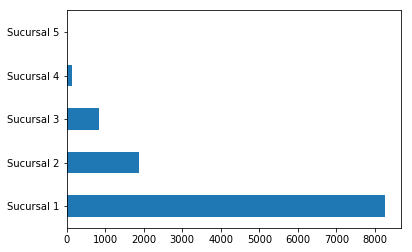

In [0]:
encuestasdf['SUCURSAL'].value_counts().plot(kind='barh')

**Calculamos la FDP:**

In [0]:
fdps = encuestasdf.SUCURSAL.value_counts(normalize=True)
fdps

Sucursal 1    0.742529
Sucursal 2    0.168447
Sucursal 3    0.076550
Sucursal 4    0.012025
Sucursal 5    0.000449
Name: SUCURSAL, dtype: float64

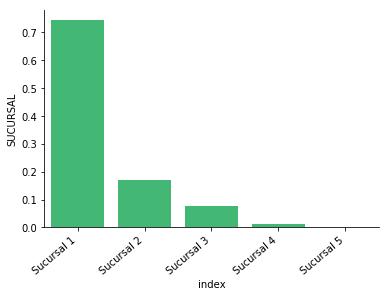

In [0]:
ax = seaborn.barplot(data=fdps.to_frame().reset_index(),
    x='index', y='SUCURSAL', color='#2ecc71')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
seaborn.despine()

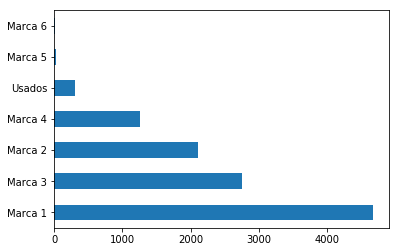

In [0]:
encuestasdf['MARCA'].value_counts().plot(kind='barh')

In [0]:
encuestasdf['Tipo de Alerta'].unique()

array(['BAJA CALIFICACION', 'BAJA CALIFICACION E INCIDENTE', 'INCIDENTE',
       'OBSERVACION', 'BAJA CALIFICACION Y RETORNO',
       'BAJA CALIFICACION Y POSIBLE RETORNO', 'BAJA CALIFICACION\n',
       'POSIBLE RETORNO', 'INFORMATIVA'], dtype=object)

## *Ejercicios Análisis y Visualización*

### **Parte I**

1.  Elegir tres variables del dataset y describir el rango o valores que pueden adoptar.
2.  Calcular la FDP de dichas variables.
3.  Analizar los outliers de otras dos variables distintas.
4.  Calcular sus estadísticos (media, moda, mediana, desviación estándar)



### **Parte II**

1.  Cuál es la probabilidad de que se haya generado una alerta del tipo "BAJA CALIFICACION" y que además sea de la Sucursal 1?
2.  Seleccionar dos pares de variables y graficar mapas de calor.
3.  Cuál es la correlación entre las variables CATEGORÍA y Tipo de Alerta?
4.  Describir al menos un insight acompañado por su gráfico. Ej: Se verifica que la mayor cantidad de alertas que generan un retorno se produce los primeros días de cada mes.


### Se evaluarán los siguientes aspectos:

*   Que se apliquen los conceptos vistos en el teórico.
*   Que el entregable no sea solo la notebook. El informe debe tener un mensaje claro y debe presentarse en un formato legible para cualquier tipo de stakeholder.
*   Que los cálculos estadísticos sean utilizados solo como herramientas para responder a las consignas.
*   Criterio aplicado al momento de elegir las variables a analizar.

#### Deadline pautado para la entrega: Lunes 13/05/2019

# Parte I

### 1. Elegir tres variables del dataset y describir el rango o valores que pueden adoptar.
### 2. Calcular la FDP de dichas variables

## *   **Variable STATUS**

In [0]:
## Valores que puede adoptar la variable STATUS

encuestasdf.STATUS.unique()

array(['GESTIONADO', 'SIN GESTION'], dtype=object)

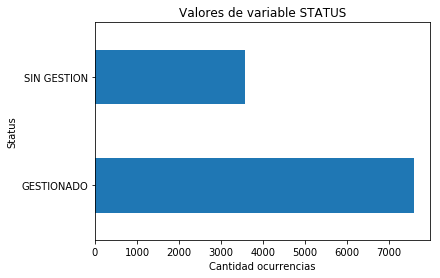

In [0]:
## Visión gráfica de los valores que puede adoptar la variable Status

encuestasdf['STATUS'].value_counts().plot(kind='barh')
_ = plt.xlabel('Cantidad ocurrencias')
_ = plt.ylabel('Status')
_ = plt.title('Valores de variable STATUS')

In [0]:
## FDP de la variable STATUS

v_fdp = encuestasdf.STATUS.value_counts(normalize=True)
v_fdp

GESTIONADO     0.680696
SIN GESTION    0.319304
Name: STATUS, dtype: float64

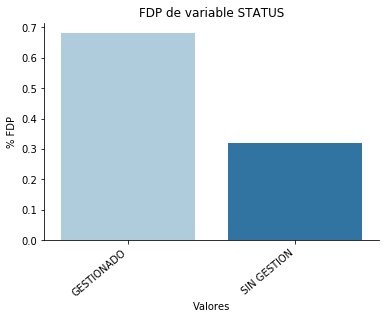

In [0]:
## Visión gráfica de FDP de STATUS

ax = seaborn.barplot(data=v_fdp.to_frame().reset_index(),
    x='index', y='STATUS', palette="Paired")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
_ = plt.xlabel('Valores')
_ = plt.ylabel('% FDP')
_ = plt.title('FDP de variable STATUS')
seaborn.despine()

## *   **Variable CATEGORIA**

In [0]:
## Valores que puede adoptar la variable CATEGORIA

encuestasdf.CATEGORIA.unique()

array(['Asesoramiento', 'Varios', 'Reclamos al Taller',
       'Reclamos al taller', 'Disconformidad con el fabricante',
       'Accesorios', 'Vehículo entregado en malas condiciones',
       'Problemas de gestoría', 'Expectativas altas del cliente',
       'Lavado', 'Demoras en la atención', 'Turnos', 'Instalaciones',
       'Condiciones generales', 'Problemas de Gestoría',
       'Problemas en la Entrega', 'Facilidad para comunicarse',
       'Vehículo Entregado en Malas Condiciones', 'VARIOS',
       'Comunicación', 'Disconformidad con el Fabricante',
       'Demoras en la Atención', 'Condiciones Generales',
       'Problemas en la entrega', 'Condiciones de atención del personal',
       'Error de Facturación', 'Expectativas Altas del Cliente',
       'Elemento de entrega diferenciada',
       'Elemento de Entrega Diferenciada',
       'Condiciones de Atención del Personal',
       'Facilidad para Comunicarse', 'No tiene',
       'Faltante de objetos personales', 'Demoras en la aten

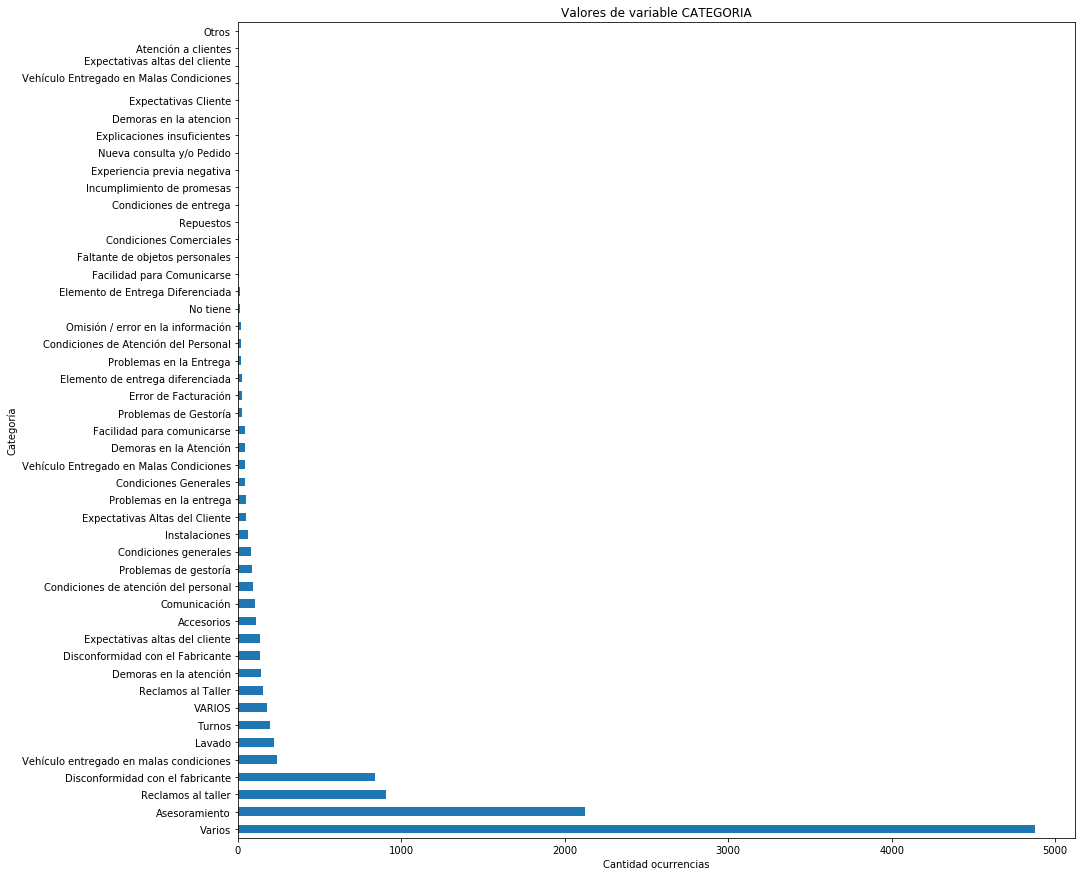

In [0]:
## Visión gráfica de los valores que puede adoptar la variable CATEGORIA

plt.figure(figsize=(15,15))
encuestasdf['CATEGORIA'].value_counts().plot(kind='barh')
_ = plt.xlabel('Cantidad ocurrencias')
_ = plt.ylabel('Categoría')
_ = plt.title('Valores de variable CATEGORIA')

In [0]:
## FDP de la variable CATEGORIA

v_fdp = encuestasdf.CATEGORIA.value_counts(normalize=True)
v_fdp.head(10) # a los fines de visualización se muestra el top 10

Varios                                     0.437803
Asesoramiento                              0.190451
Reclamos al taller                         0.081404
Disconformidad con el fabricante           0.075031
Vehículo entregado en malas condiciones    0.021181
Lavado                                     0.019566
Turnos                                     0.017771
VARIOS                                     0.015706
Reclamos al Taller                         0.014001
Demoras en la atención                     0.012745
Name: CATEGORIA, dtype: float64

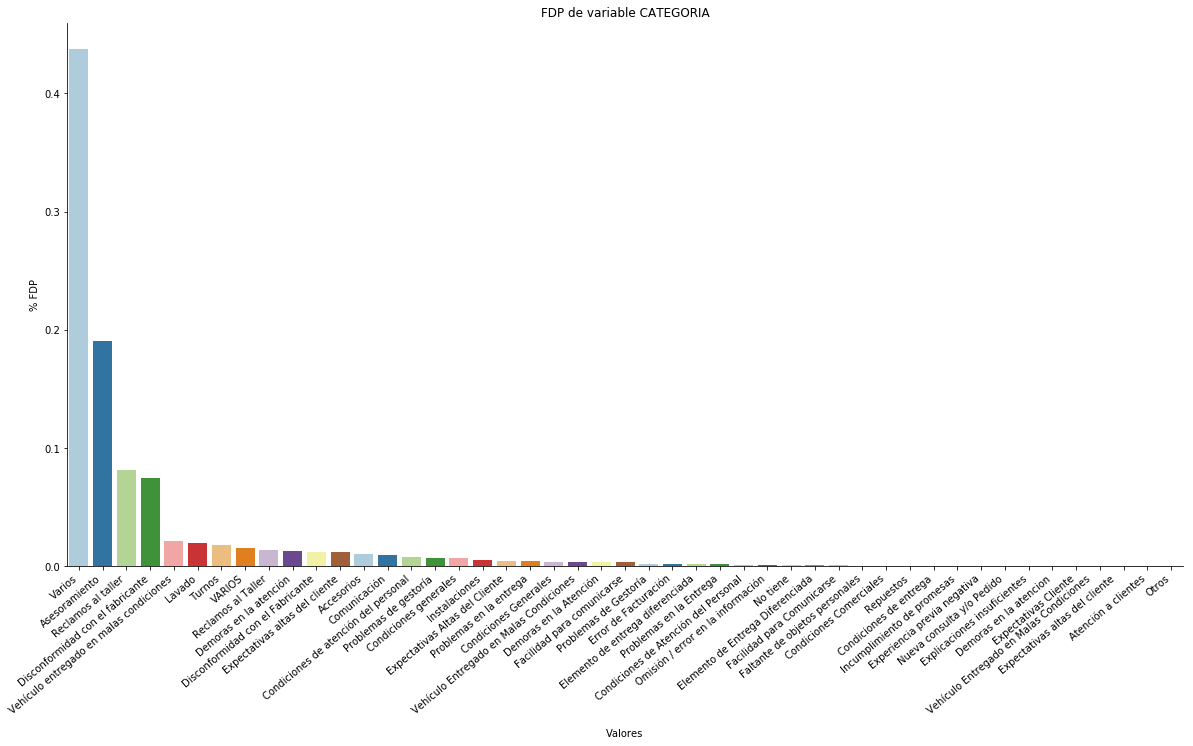

In [0]:
## Visión gráfica de FDP de CATEGORIA

plt.figure(figsize=(20,10))
ax = seaborn.barplot(data=v_fdp.to_frame().reset_index(),
    x='index', y='CATEGORIA', palette="Paired")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
_ = plt.xlabel('Valores')
_ = plt.ylabel('% FDP')
_ = plt.title('FDP de variable CATEGORIA')
seaborn.despine()

## *   **Variable PUESTO INVOLUCRADO**

In [0]:
## Valores que puede adoptar la variable PUESTO INVOLUCRADO

encuestasdf['PUESTO INVOLUCRADO'].unique()

array(['Adjudicados', 'Ventas', 'Entrega Administrativa', 'Taller',
       'Asesor', 'Gestoria', 'Turnos', 'Entrega fisica', 'Entrega Fisica',
       'Repuestos', 'Lavadero', 'Gerencia General', 'Gerencia', 'Lavado',
       'Entrega administrativa', 'Seguros', 'Asesor\n', 'Plan de Ahorro',
       'Creditos', 'Créditos', 'Facturacion', 'Caja',
       'Secretaría Comercial', 'Adjudicados\n', 'Repuestos\n', 'Taller\n',
       'Fernando Maciel', 'Entrega Fisica\n', 'Adjudicado', 'Turnos\n',
       'Alistaje', 'Plan de ahorro', '\nRepuestos \n', 'Seguro',
       'Administracion', 'Secretaria Comercial', nan, 'Entreg Fisica',
       'Accesorios', 'Repustos', 'Entrega Administrativo',
       'Entrega física', 'Limpieza', 'Entrega administrativo', 'Repuesto'],
      dtype=object)

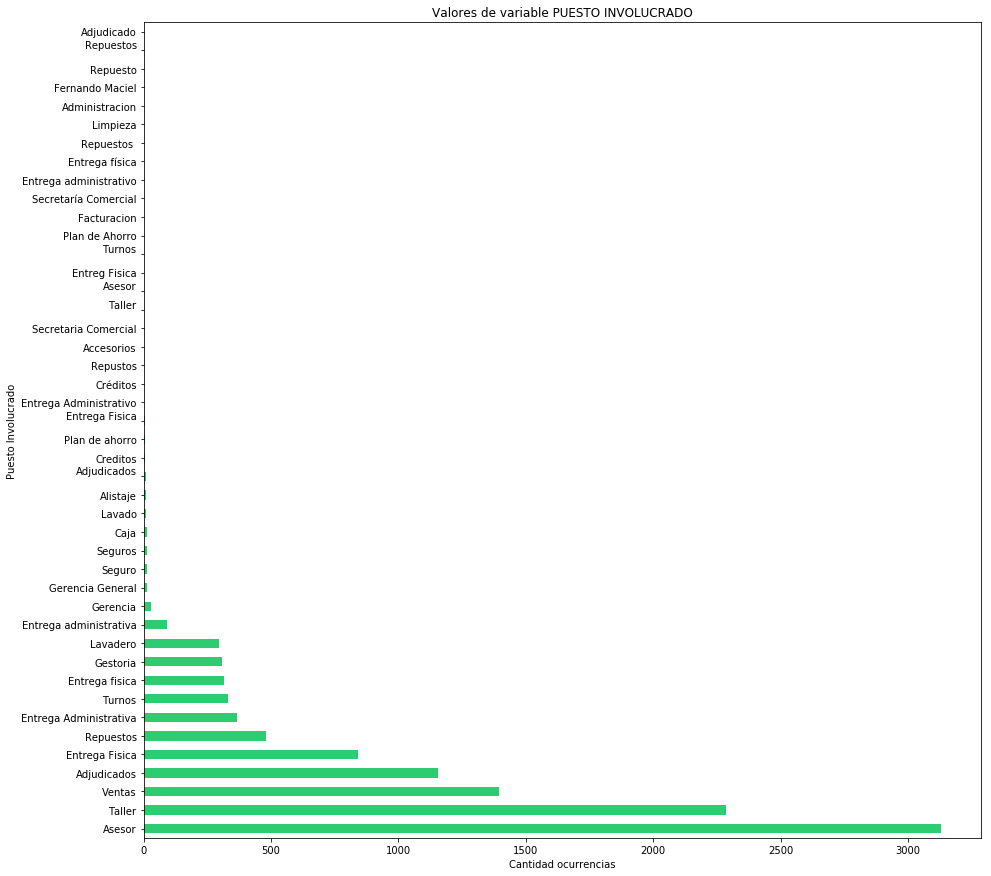

In [0]:
## Visión gráfica de los valores que puede adoptar la variable PUESTO INVOLUCRADO

plt.figure(figsize=(15,15))
encuestasdf['PUESTO INVOLUCRADO'].value_counts().plot(kind='barh', color='#2ecc71')
_ = plt.xlabel('Cantidad ocurrencias')
_ = plt.ylabel('Puesto Involucrado')
_ = plt.title('Valores de variable PUESTO INVOLUCRADO')

In [0]:
## FDP de la variable PUESTO INVOLUCRADO

v_fdp = encuestasdf['PUESTO INVOLUCRADO'].value_counts(normalize=True)
v_fdp

Asesor                    0.280829
Taller                    0.205170
Ventas                    0.125022
Adjudicados               0.103572
Entrega Fisica            0.075660
Repuestos                 0.043080
Entrega Administrativa    0.032938
Turnos                    0.029528
Entrega fisica            0.028451
Gestoria                  0.027464
Lavadero                  0.026476
Entrega administrativa    0.008167
Gerencia                  0.002693
Gerencia General          0.001257
Seguro                    0.001257
Seguros                   0.001077
Caja                      0.000987
Lavado                    0.000898
Alistaje                  0.000718
Adjudicados\n             0.000718
Creditos                  0.000628
Plan de ahorro            0.000539
Entrega Fisica\n          0.000359
Entrega Administrativo    0.000269
Créditos                  0.000180
Repustos                  0.000180
Accesorios                0.000180
Secretaria Comercial      0.000180
Taller\n            

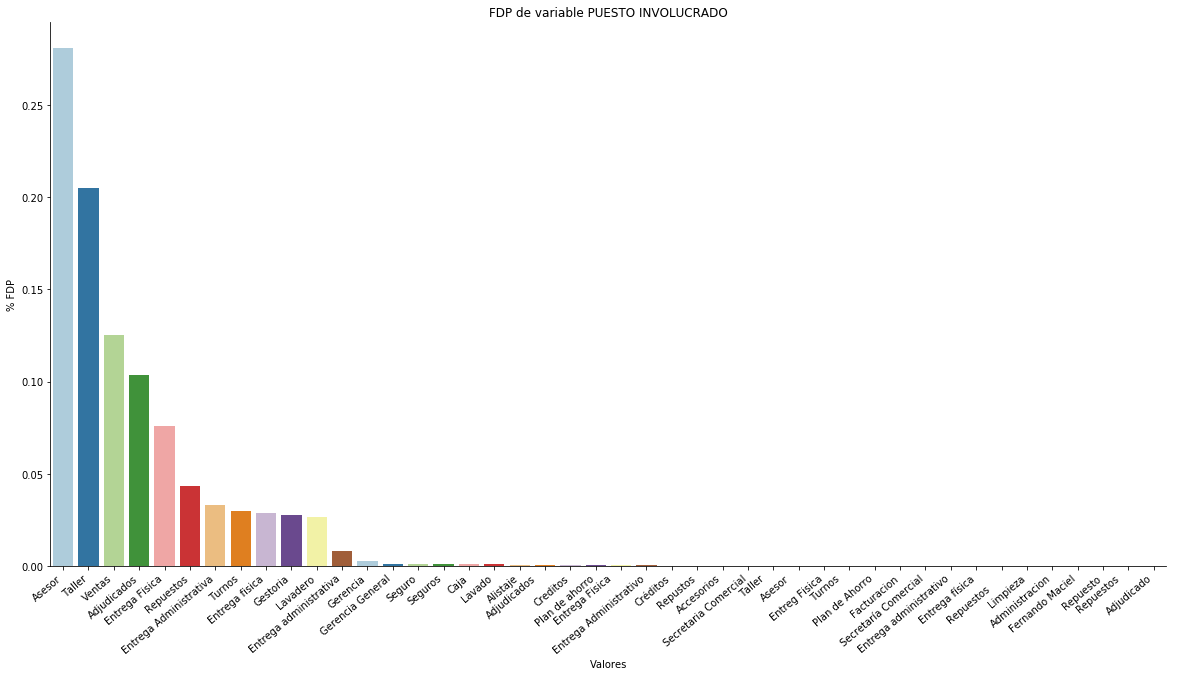

In [0]:
## Visión gráfica de FDP de PUESTO INVOLUCRADO

plt.figure(figsize=(20,10))
ax = seaborn.barplot(data=v_fdp.to_frame().reset_index(),
    x='index', y='PUESTO INVOLUCRADO', palette="Paired")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
_ = plt.xlabel('Valores')
_ = plt.ylabel('% FDP')
_ = plt.title('FDP de variable PUESTO INVOLUCRADO')
seaborn.despine()

### 3. Analizar los outliers de otras dos variables distintas.
### 4. Calcular sus estadísticos (media, moda, mediana, desviación estándar)

## *   **Variable Tiempo de respuesta (dias)**

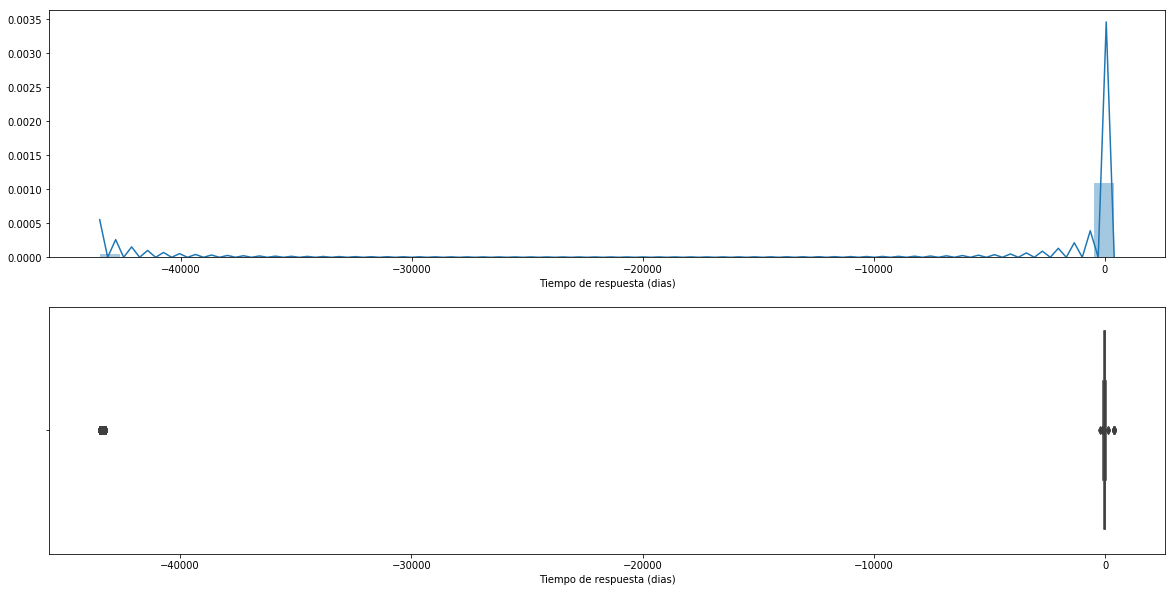

In [0]:
v_tiempos_rta = pd.to_numeric(encuestasdf['Tiempo de respuesta (dias)'], errors='coerce')

plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
seaborn.distplot(v_tiempos_rta.dropna())
plt.subplot(2,1,2)
seaborn.boxplot(v_tiempos_rta.dropna())
plt.show()

In [0]:
print('\033[1m' + 'Valores estadísticos de la variable Tiempo de respuesta (dias)\n')
v_tiempos_rta.describe()

Valores estadísticos de la variable Tiempo de respuesta (dias)



count    11141.000000
mean     -2029.394966
std       9140.188481
min     -43480.000000
25%        -43.276000
50%          1.000000
75%          4.000000
max        384.000000
Name: Tiempo de respuesta (dias), dtype: float64

Analizando los valores negativos del campo Tiempo de respuesta (dias)

In [236]:
encuestasdf[pd.to_numeric(encuestasdf['Tiempo de respuesta (dias)'], errors='coerce') < 0].head(10)

,Unnamed: 0,MARCA,FECHA ALERTA,FECHA VENCIMIENTO,Mes,Tipo de Alerta,STATUS,PLAZO DE GESTION,SUCURSAL,CANAL,Vendedor / RC,RESPONSABLE DE GESTIONAR ALERTA,CLIENTE,VIN,VEHÍCULO,Satisfaccion INICIAL,Recomendacion INICIAL,Incidente o Retorno INICIAL,CATEGORIA,CAUSAS,PUESTO INVOLUCRADO,Tiempo de respuesta (dias),ESTADO,Resp. Alerta
23,23,Marca 2,2018-08-10,2018-08-13,Agosto,OBSERVACION,SIN GESTION,NaN,Sucursal 1,VN,650a93dbeec354589c0dc5aecd57e5a8,524056b5a2b4dbc95584683b6550ae01,998a30051c12626b697f95bbb461e8b0,b4762324fd59f18213f9597f6bc5dcf0,17a6e24a3e19ef4f96804797a0250904,10,10,NO,Asesoramiento,Experiencia previa en Posventa,Entrega fisica,-43322,SIN RESPUESTA,Responsable 3
33,33,Marca 1,2018-08-10,2018-08-14,Agosto,BAJA CALIFICACION Y POSIBLE RETORNO,SIN GESTION,NaN,Sucursal 1,PV,3fdcf47c29f7993066bc6cc69e1447d9,5ddb224ccc347d0bd21137b0bf52130e,8e960f92dec5de7d9ba42f044f3191a2,02c7ce884601f66e2ed2e5eabc272140,39d7b05cd7a8cacdf1d505f2f33d6255,8,9,POSIBLE RETORNO,Expectativas altas del cliente,Nota 7 y 8 sin comentario negativo,Asesor,-43.322,SIN RESPUESTA,Responsable 1
34,34,Marca 1,2018-08-10,2018-08-14,Agosto,BAJA CALIFICACION,SIN GESTION,NaN,Sucursal 1,PV,246e89c6fcd93a60463be9821f1d0d5d,246e89c6fcd93a60463be9821f1d0d5d,6cf09eae0dfc1f574ff879bae13b2678,3e0516604c4d7ea77e63df4359902fa5,afee97063896539480a5565756d32aee,8,9,NO,Lavado,Vehículo no lavado / aspirado,Lavadero,-43.322,SIN RESPUESTA,Responsable 1
35,35,Marca 1,2018-08-10,2018-08-14,Agosto,BAJA CALIFICACION,SIN GESTION,NaN,Sucursal 1,PV,3fdcf47c29f7993066bc6cc69e1447d9,5ddb224ccc347d0bd21137b0bf52130e,24262d33a8cccb751ce3c56cbb542752,0f4f256f29f36f534bc64c5f1e8407cb,8bcbb2d76706e5e5a5d93b6a982a8574,8,10,NO,Expectativas altas del cliente,Nota 7 y 8 sin comentario negativo,Asesor,-43.322,SIN RESPUESTA,Responsable 1
36,36,Marca 1,2018-08-10,2018-08-14,Agosto,BAJA CALIFICACION,SIN GESTION,NaN,Sucursal 1,PV,aa582b03e5a21ff9bdfe6b108d0f8dc4,aa582b03e5a21ff9bdfe6b108d0f8dc4,54ab1221192ee2a9d6651813b3f3e89b,28c9bc7e676ff48ffde79a32ef20dd63,f33be1f14dc5f54c5721fda022c1e966,9,8,NO,Varios,Comunicación : Falta de comunicación ante nove...,Asesor,-43.322,SIN RESPUESTA,Responsable 3
37,37,Marca 1,2018-08-10,2018-08-14,Agosto,BAJA CALIFICACION,SIN GESTION,NaN,Sucursal 1,PV,aa582b03e5a21ff9bdfe6b108d0f8dc4,aa582b03e5a21ff9bdfe6b108d0f8dc4,a186e7973a2a99a83a7064341cdad089,79ee92081f8747001556c367d3f77187,7625f3a04ac810ceef2083a6b65d64e5,7,9,NO,Varios,Asesoramiento : Agendamiento del Turno ; Disco...,Taller,-43.322,SIN RESPUESTA,Responsable 3
38,38,Marca 1,2018-08-10,2018-08-14,Agosto,BAJA CALIFICACION,SIN GESTION,NaN,Sucursal 1,PV,61a423da4122794df98c8362238f9a78,61a423da4122794df98c8362238f9a78,ce5463d843ab6e13d0785250ac3b6bc5,3ae3611db9df1e4b3bd10b5d348614bf,8bcbb2d76706e5e5a5d93b6a982a8574,8,10,NO,Varios,Demoras en la Atención: Recepción del auto; Re...,Asesor,-43.322,SIN RESPUESTA,Responsable 2
39,39,Marca 1,2018-08-10,2018-08-14,Agosto,BAJA CALIFICACION,SIN GESTION,NaN,Sucursal 1,PV,246e89c6fcd93a60463be9821f1d0d5d,246e89c6fcd93a60463be9821f1d0d5d,4b70070254149618cb2a9b7625fe1906,87b4c1fa4fb81cb98a7edb532c40efd6,39d7b05cd7a8cacdf1d505f2f33d6255,8,9,NO,Asesoramiento,En la recepción del taller,Asesor,-43.322,SIN RESPUESTA,Responsable 2
40,40,Marca 1,2018-08-10,2018-08-14,Agosto,BAJA CALIFICACION Y RETORNO,SIN GESTION,NaN,Sucursal 1,PV,246e89c6fcd93a60463be9821f1d0d5d,246e89c6fcd93a60463be9821f1d0d5d,a03577c91158a5dbe23adb6cfa35e5ab,84625cda00f5d49a65fe8bd59274f50d,93ae83899af768334d82e1601748211f,8,7,SI,Reclamos al taller,Trabajo parcial,Taller,-43.322,SIN RESPUESTA,Responsable 2
41,41,Marca 1,2018-08-10,2018-08-13,Agosto,OBSERVACION,SIN GESTION,NaN,Sucursal 1,PV,3fdcf47c29f7993066bc6cc69e1447d9,5ddb224ccc347d0bd21137b0bf52130e,8b62d73f2553a7a79ab9dab7aaea7ef9,f268f445b0927812c956f21f282f10d3,8bcbb2d76706e5e5a5d93b6a982a8574,9,10,NO,Demoras en la atención,"Recepción del auto, Devolución del VH",Asesor,-43.322,SIN RESPUESTA,Responsable 1


In [0]:
encuestasdf[pd.to_numeric(encuestasdf['Tiempo de respuesta (dias)'], errors='coerce') < 0].describe(include='all').loc[['count','top','freq','unique']]

,Unnamed: 0,MARCA,FECHA ALERTA,FECHA VENCIMIENTO,Mes,Tipo de Alerta,STATUS,PLAZO DE GESTION,SUCURSAL,CANAL,Vendedor / RC,RESPONSABLE DE GESTIONAR ALERTA,CLIENTE,VIN,VEHÍCULO,Satisfaccion INICIAL,Recomendacion INICIAL,Incidente o Retorno INICIAL,CATEGORIA,CAUSAS,PUESTO INVOLUCRADO,Tiempo de respuesta (dias),ESTADO,Resp. Alerta
count,3627.0,3627,3627,3627,3627,3627,3627,497,3627,3627,3627,3627,3627,3626,3579,3627.0,3627.0,3237,3627,3627,3626,3627.000,3627,3627
top,NaN,Marca 1,2018-07-05 00:00:00,2018-09-06 00:00:00,Agosto,OBSERVACION,SIN GESTION,Fuera de plazo,Sucursal 1,PV,aa582b03e5a21ff9bdfe6b108d0f8dc4,aa582b03e5a21ff9bdfe6b108d0f8dc4,1f5fb535531892beb1245e90ea602bf3,567f0e5e44082e9c0020a88542794011,8bcbb2d76706e5e5a5d93b6a982a8574,10.0,10.0,NO,Varios,Trabajo parcial,Asesor,-43.286,SIN RESPUESTA,Responsable 1
freq,NaN,2143,58,56,674,1756,3538,412,2890,2820,401,471,4,4,337,1054.0,1429.0,2189,1654,244,1168,55.000,3556,1255
unique,NaN,6,173,190,11,8,2,4,4,4,398,211,3441,3439,556,11.0,11.0,14,43,1746,29,280.000,8,4


***Un gran porcentaje de los valores negativos en "Tiempo de respuesta (dias)" pertenecen al Status SIN GESTION y estado SIN RESPUESTA, pero no existe evidencia suficiente para inferir si estos datos son erroneos***

***A los fines del presente análisis y hasta obtener feedback del cliente respecto a los valores negativos, se continuará analizando los valores por encima de cero.***

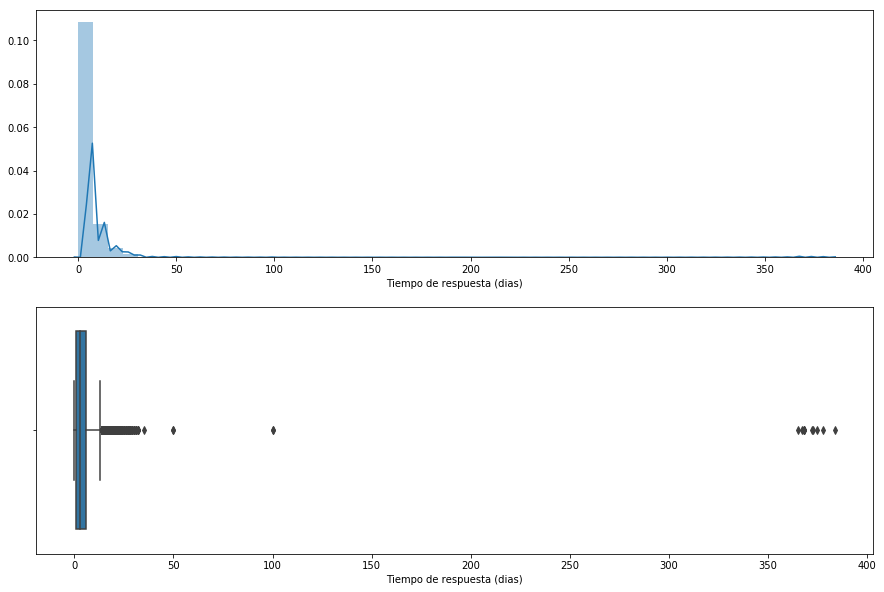

In [239]:
v_tiempos_rta_clean = v_tiempos_rta[v_tiempos_rta >= 0]

plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
seaborn.distplot(v_tiempos_rta_clean.dropna())
plt.subplot(2,1,2)
seaborn.boxplot(v_tiempos_rta_clean.dropna())
plt.show()

In [0]:
print('\033[1m' + 'Valores estadísticos de la variable Tiempo de respuesta (dias)\n')
v_tiempos_rta_clean.describe()

Valores estadísticos de la variable Tiempo de respuesta (dias)



count    7514.000000
mean        5.008384
std        15.039123
min         0.000000
25%         1.000000
50%         3.000000
75%         6.000000
max       384.000000
Name: Tiempo de respuesta (dias), dtype: float64

In [237]:
## Se analizar aquellos registros que superan 1.5 veces el IQR del whisker superior

q1, q3 = numpy.percentile(sorted(v_tiempos_rta_clean),[25,75])
iqr = q3 - q1
whisker = q3 + (1.5 * iqr) 
print('\033[1m' + 'Top de registros que representan outliers\n')
encuestasdf[pd.to_numeric(encuestasdf['Tiempo de respuesta (dias)'], errors='coerce')>whisker].sort_values(by = 'Tiempo de respuesta (dias)', ascending = False).head(10)


Top de registros que representan outliers



,Unnamed: 0,MARCA,FECHA ALERTA,FECHA VENCIMIENTO,Mes,Tipo de Alerta,STATUS,PLAZO DE GESTION,SUCURSAL,CANAL,Vendedor / RC,RESPONSABLE DE GESTIONAR ALERTA,CLIENTE,VIN,VEHÍCULO,Satisfaccion INICIAL,Recomendacion INICIAL,Incidente o Retorno INICIAL,CATEGORIA,CAUSAS,PUESTO INVOLUCRADO,Tiempo de respuesta (dias),ESTADO,Resp. Alerta
10499,10499,Marca 1,2018-12-12,2018-12-17,Diciembre,OBSERVACION,GESTIONADO,FUERA DE PLAZO,Sucursal 1,PV,246e89c6fcd93a60463be9821f1d0d5d,246e89c6fcd93a60463be9821f1d0d5d,c99994c2e21cedbb3fdef89db43f5137,e846e0b0d34b13ae9b0f8c32c43cf44a,c5e575270791275f2d60082f17a785d4,10,10,NO,Asesoramiento,Nuevo problema,Asesor,384,GESTIONADO,Responsable 1
10171,10171,Marca 3,2018-12-18,2018-12-21,Diciembre,BAJA CALIFICACION Y RETORNO,GESTIONADO,FUERA DE PLAZO,Sucursal 2,PV,973b522f65bc9ff13453331a5fe36536,973b522f65bc9ff13453331a5fe36536,714a584d16373a13617f19e5bca7dc62,639d58b24f2bce23c14db6a54bc6a9f5,13c4fce949a0fbaf61df32a414c1d047,NSNC,NSNC,"SI, POR EL MISMO MOTIVO",Varios,Reclamos al Taller : Mala reparación ; Lavado ...,Taller,378,REPROGRAMADO,Responsable 3
10220,10220,Marca 3,2018-12-21,2018-12-28,Diciembre,BAJA CALIFICACION Y RETORNO,GESTIONADO,FUERA DE PLAZO,Sucursal 2,PV,973b522f65bc9ff13453331a5fe36536,973b522f65bc9ff13453331a5fe36536,425bb22b942d056042b09902be5e1e64,9f6fbfc1a6c847f4bf9af2d20b703eb9,67180f967b5f2201c4f30c85c51d9bd7,8,8,"SI, POR EL MISMO MOTIVO",Varios,Expectativas Altas del Cliente: Nota menor a 9...,Asesor,375,REPROGRAMADO,Responsable 1
10396,10396,Marca 4,2018-12-20,2018-12-27,Diciembre,BAJA CALIFICACION,GESTIONADO,FUERA DE PLAZO,Sucursal 1,VN,c2fd51b1bb2cd46dae1f28b572f95d57,b14b8fe68d89aae615da054f16a5034e,0610fc2780fdbdf25bb9248e127df580,9514b7a2a4d47dda5196b33fe92b9175,3314fb0f781f5e4fb042059a8b971eee,8,9,NO,Asesoramiento,Plazos de entrega,Entrega Administrativa,373,REVERTIDO,Responsable 1
10232,10232,Marca 3,2018-12-24,2018-12-28,Diciembre,BAJA CALIFICACION E INCIDENTE,GESTIONADO,FUERA DE PLAZO,Sucursal 1,PA,c08ca320ccbf93cb23688866ea16e514,798802652593cf331b510b657ea7dbbf,21c28f879cd2c43b4629b621060e75ad,ddf6ba162cbab8c62f2d516a55c180d1,16f5552e223f317dee929346c2d82e2f,5,3,SI,Asesoramiento,"Plazos de entrega, Incumplimiento de promesas",Adjudicados,372,NO REVERTIDO,Responsable 1
10254,10254,Marca 3,2018-12-28,2019-01-04,Diciembre,OBSERVACION,GESTIONADO,FUERA DE PLAZO,Sucursal 2,PV,973b522f65bc9ff13453331a5fe36536,973b522f65bc9ff13453331a5fe36536,794beb4708905c0692c1217c4907bd9d,1dbbe0b5af910c6d6e4055e863f7ab19,cde89831c66a14b612425d0a2a78bbb6,10,10,NO,Disconformidad con el Fabricante,Políticas de precios,Asesor,368,GESTIONADO,Responsable 3
10242,10242,Marca 3,2018-12-28,2019-01-04,Diciembre,BAJA CALIFICACION,GESTIONADO,FUERA DE PLAZO,Sucursal 2,PV,973b522f65bc9ff13453331a5fe36536,973b522f65bc9ff13453331a5fe36536,352eb42e56c789b11a6bb816c201c6fd,c0cea661f90c48c46fbc50d87940116e,440fe7a7fc759ca4c1cbfc07195a041a,5,NSNC,NO,Varios,"Instalaciones : Infraestructura, Ubicación ; R...",Taller,368,EN PROCESO,Responsable 3
10244,10244,Marca 3,2018-12-28,2019-01-04,Diciembre,OBSERVACION,GESTIONADO,FUERA DE PLAZO,Sucursal 2,PV,973b522f65bc9ff13453331a5fe36536,973b522f65bc9ff13453331a5fe36536,8035d33933f86cd23795e2f6b8a582f8,dd4549041924ff966dc85b2c9370d6e5,a643d10ca14cdec8f2266da03795b052,10,10,"SI, POR OTRO MOTIVO",Varios,Lavado : Vehículo no lavado / aspirado ; Recla...,Taller,368,GESTIONADO,Responsable 3
10246,10246,Marca 3,2018-12-28,2019-01-04,Diciembre,OBSERVACION,GESTIONADO,FUERA DE PLAZO,Sucursal 2,PV,973b522f65bc9ff13453331a5fe36536,973b522f65bc9ff13453331a5fe36536,c9c6d191e5007a200b5aa7441af28447,59c0a86d367f1ba930e71681cb2d010a,2a19766759fe0861dfc5910eed69f1d7,10,10,NO,Varios,Lavado : Lavado mal terminado ; Reclamos al Ta...,Taller,368,GESTIONADO,Responsable 3
10360,10360,Marca 4,2018-12-12,2018-12-17,Diciembre,BAJA CALIFICACION,GESTIONADO,FUERA DE PLAZO,Sucursal 1,PV,9128b011eb9b03828052658b38dc06ef,9128b011eb9b03828052658b38dc06ef,d2e91f5f9879f6bbd461b955e1c234a1,98f75ec8cfec743e0f3aa

## *   **Variable Satisfaccion INICIAL**

In [0]:
encuestasdf['Satisfaccion INICIAL'].value_counts()

10      3484
9       3408
8       1719
7        805
5        464
NSNC     342
6        337
1        244
4        150
3        100
2         90
Name: Satisfaccion INICIAL, dtype: int64

In [0]:
encuestasdf['Satisfaccion INICIAL'].value_counts(normalize=True, dropna=False)

10      0.312663
9       0.305842
8       0.154267
7       0.072243
5       0.041640
NSNC    0.030692
6       0.030243
1       0.021897
4       0.013461
3       0.008974
2       0.008077
Name: Satisfaccion INICIAL, dtype: float64

*Se observa que los valores NSNC de la columna Satisfaccion INICIAL corresponden a un valor que representa solo el 3% de dicha columna, por lo cual a fin de tratar a esta variable como numérica se procederá a ejecutar "errors='coerce' a fin de que dicho valor se convierta a nan"*

Info de la variable Satisfaccion INICIAL al convertir la misma a numérica 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11143 entries, 0 to 11142
Data columns (total 1 columns):
Satisfaccion INICIAL    10801 non-null float64
dtypes: float64(1)
memory usage: 87.1 KB


None

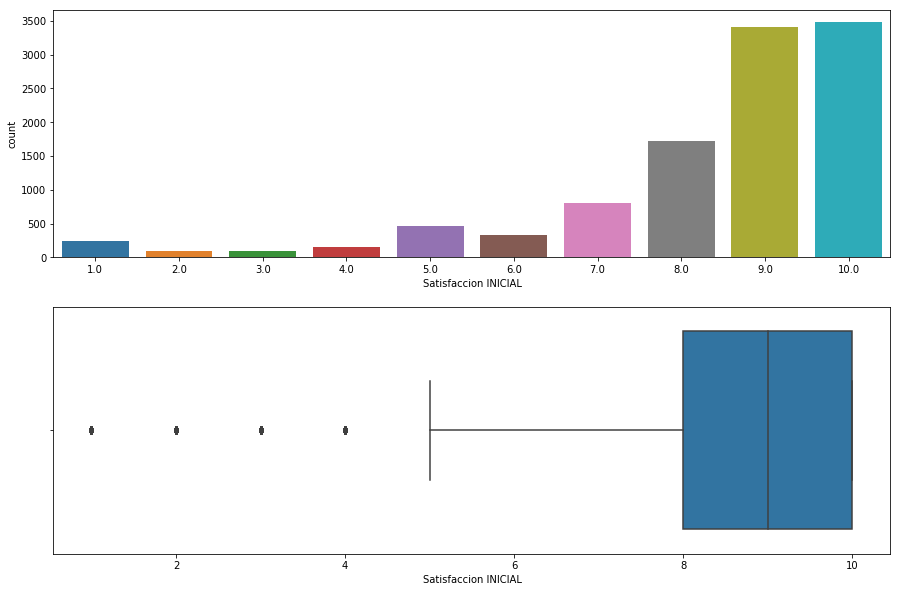

In [238]:
v_satif_ini = pd.to_numeric(encuestasdf['Satisfaccion INICIAL'], errors='coerce')

print('\033[1m' + 'Info de la variable Satisfaccion INICIAL al convertir la misma a numérica \n')
display(v_satif_ini.to_frame().info())

plt.figure(figsize=(15,10))
_ = plt.subplot(2,1,1)
_ = seaborn.countplot(v_satif_ini.dropna())
_ = plt.subplot(2,1,2)
_ = seaborn.boxplot(v_satif_ini.dropna())
plt.show()

In [0]:
print('\033[1m' + 'Valores estadísticos de la variable Satisfaccion INICIAL\n')
v_satif_ini.describe()

Valores estadísticos de la variable Satisfaccion INICIAL



count    10801.000000
mean         8.384872
std          1.975992
min          1.000000
25%          8.000000
50%          9.000000
75%         10.000000
max         10.000000
Name: Satisfaccion INICIAL, dtype: float64

**Para el caso de la variable Satisfacción INICIAL, siendo que el rango de la misma corresponde a los valores entre 0 a 10, y dada la naturaleza de puntaje de ranking de la misma, no resulta necesario tratar ningún outlier; salvo aquellos que se representan como NSNC que serán tratados como nulos.**

# PARTE II

###  1.  Cuál es la probabilidad de que se haya generado una alerta del tipo "BAJA CALIFICACION" y que además sea de la Sucursal 1?

In [0]:
prob = encuestasdf[(encuestasdf['Tipo de Alerta'] == 'BAJA CALIFICACION') & (encuestasdf['SUCURSAL'] == 'Sucursal 1')].shape[0]/encuestasdf.shape[0]
print('\033[1m' + 'La probabilidad de que se haya generado una alerta del tipo BAJA CALIFICACIÓN y que sea de la sucursal 1 es de ' + str(prob))

La probabilidad de que se haya generado una alerta del tipo BAJA CALIFICACIÓN y que sea de la sucursal 1 es de 0.22642017410033205


### 2. Seleccionar dos pares de variables y graficar mapas de calor.

### Heatmap entre Tipo de Alerta & Status respeto a la Satisfacción Inicial

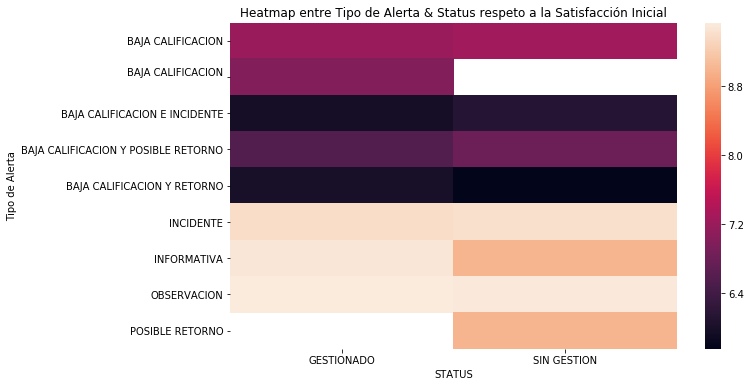

In [241]:
plt.figure(figsize=(10,6))
heatmap_1 = encuestasdf[['Tipo de Alerta','STATUS','Satisfaccion INICIAL']].copy()
heatmap_1['Satisfaccion INICIAL'] = pd.to_numeric(heatmap_1['Satisfaccion INICIAL'], errors='coerce')

_ = seaborn.heatmap(pd.crosstab(heatmap_1['Tipo de Alerta'], heatmap_1['STATUS'], values=heatmap_1['Satisfaccion INICIAL'].dropna(), aggfunc='mean'))
plt.title('Heatmap entre Tipo de Alerta & Status respeto a la Satisfacción Inicial')
plt.show()

### Heatmap entre Mes & Sucursal respecto a la Recomendacion Inicial

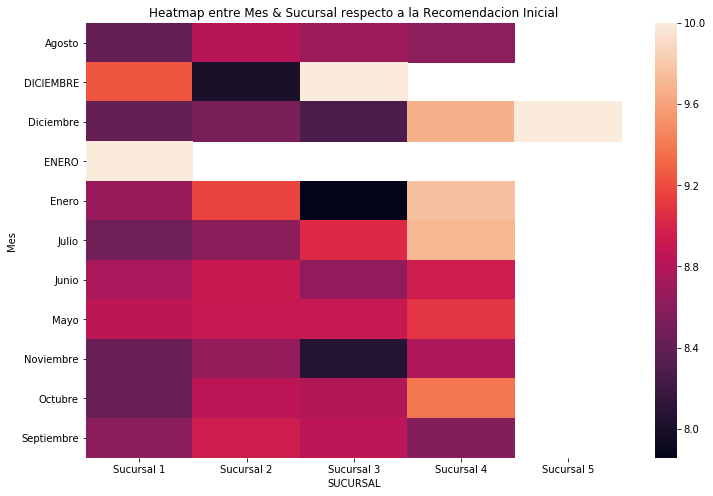

In [242]:
plt.figure(figsize=(12,8))
heatmap_2 = encuestasdf[['Mes','SUCURSAL','Recomendacion\nINICIAL']].copy()
heatmap_2['Recomendacion\nINICIAL'] = pd.to_numeric(heatmap_2['Recomendacion\nINICIAL'], errors='coerce')

_ = seaborn.heatmap(pd.crosstab(heatmap_2['Mes'], heatmap_2['SUCURSAL'], values=heatmap_2['Recomendacion\nINICIAL'].dropna(), aggfunc='mean'))
plt.title('Heatmap entre Mes & Sucursal respecto a la Recomendacion Inicial')
plt.show()


### Heatmap de correlaciones entre variables numéricas

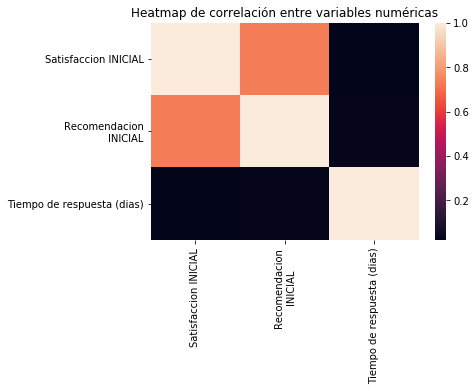

In [0]:
heatmap_3 = encuestasdf[['Satisfaccion INICIAL','Recomendacion\nINICIAL','Tiempo de respuesta (dias)']].copy()
heatmap_3['Satisfaccion INICIAL'] = pd.to_numeric(heatmap_3['Satisfaccion INICIAL'], errors='coerce')
heatmap_3['Recomendacion\nINICIAL'] = pd.to_numeric(heatmap_3['Recomendacion\nINICIAL'], errors='coerce')
heatmap_3['Tiempo de respuesta (dias)'] = pd.to_numeric(heatmap_3['Tiempo de respuesta (dias)'], errors='coerce')
plt.title('Heatmap de correlación entre variables numéricas')
_ = seaborn.heatmap(heatmap_3.corr())

**De aquí se puede observar que existe una fuerte correlación entre las variables Satisfaccion Inicial y Recomendación Inicial**

### 3. Cuál es la correlación entre las variables CATEGORÍA y Tipo de Alerta?

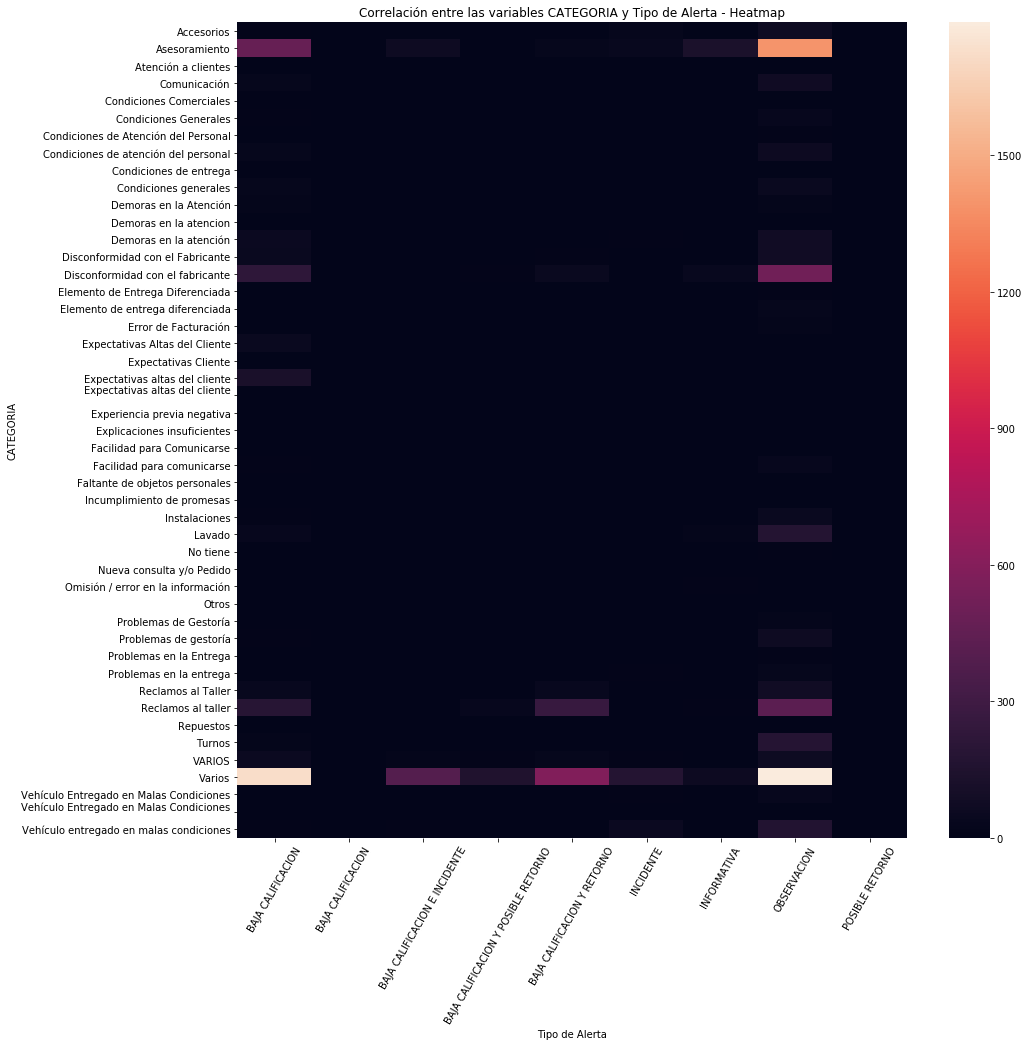

In [0]:
_ =  plt.figure(figsize=(15,15))
df_chi = encuestasdf[['CATEGORIA','Tipo de Alerta']]

df_chi = df_chi.pivot_table(index='CATEGORIA', columns='Tipo de Alerta', aggfunc=len, fill_value=0)
_ = seaborn.heatmap(df_chi)
_ = plt.xticks(rotation=60)
_ = plt.title('Correlación entre las variables CATEGORIA y Tipo de Alerta - Heatmap')

In [0]:
from scipy import stats
chi2, pval, dots, expected = stats.chi2_contingency(df_chi)
print('Valor del estadístico chi2: ' + str(chi2) + ' ; p-value: ' , pval)

Valor del estadístico chi2: 3582.181152422033 ; p-value:  0.0


(3582.181152422033, 0.0)

Al ser el valor de p-value tan pequeño rechazamos la hipótesis nula de que ambas variables son independientes, siendo la hipótesis alternativa que ambas variables tienen dependencia aunque esta relación no se encuentra especificada.

### 4. Describir al menos un insight acompañado por su gráfico

A los fines del análisis se procede a crear una copia del dataframe de solos los datos que se estudiarán

In [0]:
subdf = encuestasdf[[ 'Mes', 'MARCA', 'Tipo de Alerta']].copy()
subdf['Mes'] = subdf['Mes'].str.capitalize()
print(subdf['Mes'].value_counts())
## Al momento de la visualización excluimos los datos de Enero ya que para en ese caso no existen datos para Todo el mes.
orden = ['Junio','Julio','Agosto','Septiembre','Noviembre','Diciembre']

Agosto        1767
Julio         1469
Septiembre    1458
Octubre       1452
Mayo          1441
Junio         1255
Noviembre     1108
Diciembre     1088
Enero          105
Name: Mes, dtype: int64


Se procede a graficar las cantidad de alertas producidas por mes respecto a las distintas marcas, discriminando así tambien en colores los tipos de alertas generadas.

<Figure size 720x360 with 0 Axes>

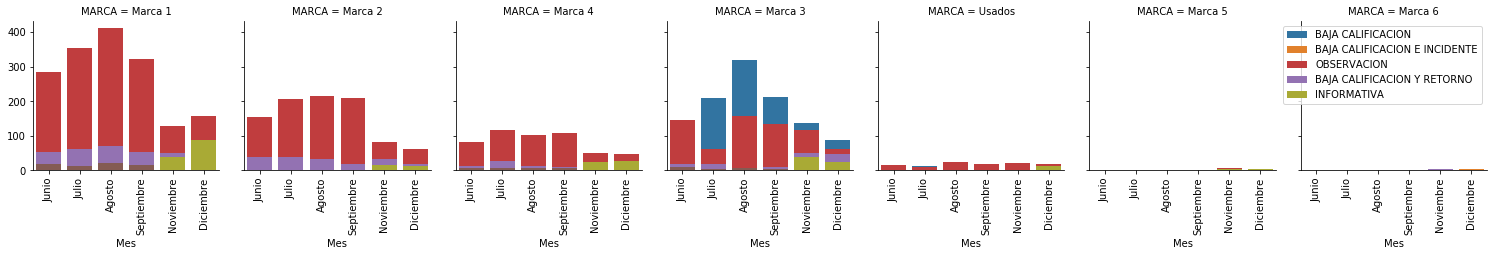

In [0]:
_ = plt.figure(figsize=(10,5))
g = seaborn.FacetGrid(subdf, col='MARCA', hue='Tipo de Alerta')
_ = (g.map(seaborn.countplot,'Mes', order=orden))
_ = g.set_xticklabels(rotation=90)
_ = plt.legend(loc='best') 

De este análisis podemos observar lo siguiente:


*   Durante el mes de agosto existe en niveles generales una mayor cantidad de alertas generadas, en donde la Marca 1 y 3 representan gran cantidad de las mismas.
*   La marca 3 a partir de Julio, y en proporciones mantenidas durante los meses siguientes, fue la que ha producido mayor cantidad de alertas del tipo "BAJA CALIFICACIÓN"
*   La marca 1 es aquella que en la mayoria de los meses bajo estudio produjo mayor cantidad de alertas, aunque las mismas pertenecen al tipo de alerta de "OBSERVACIÓN"
*   Para las marcas 5 y 6 no se registran cantidad de alertas significativas, y este comportamiento se mantiene durante todos los meses bajo estudio.



